In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pickle


In [36]:
# ===================== function ===========================================
# Plot the training and validation accuracy and loss
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    #plt.legend()
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
def saveScaller(scaler):
    with open('nn_scaller.pkl', 'wb') as file:
        pickle.dump(scaler, file)
    

In [37]:
df = pd.read_csv('../../data/cleaned_remaining_na_-1.csv')

X = df.drop(columns=['id', 'churn',"service_failure_count"])
print(df["churn"].value_counts())
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


churn
1    40050
0    31843
Name: count, dtype: int64


In [38]:
# ==== Save Scaler ===
saveScaller(scaler)

In [39]:
print(X.isnull().sum(), y_train.isnull().sum())  # For pandas DataFrame

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
remaining_contract             0
download_avg                   0
upload_avg                     0
download_over_limit            0
dtype: int64 0


In [40]:
# Step 2: Build the neural network model
model = Sequential([
    Input((X_train.shape[1],)),
    Dense(128, activation='relu'),  # Input layer and first hidden layer
    Dropout(0.25),
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.25),
    Dense(32, activation='relu'),  # Third hidden layer
    Dropout(0.25),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], )

# Step 4: Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Step 5: Evaluate the model
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")  # Convert probabilities to binary predictions


Epoch 1/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8656 - loss: 0.3544 - val_accuracy: 0.9125 - val_loss: 0.2589
Epoch 2/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9081 - loss: 0.2769 - val_accuracy: 0.9197 - val_loss: 0.2354
Epoch 3/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9177 - loss: 0.2506 - val_accuracy: 0.9261 - val_loss: 0.2237
Epoch 4/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.9196 - loss: 0.2443 - val_accuracy: 0.9261 - val_loss: 0.2224
Epoch 5/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.9227 - loss: 0.2365 - val_accuracy: 0.9279 - val_loss: 0.2149
Epoch 6/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.9261 - loss: 0.2305 - val_accuracy: 0.9295 - val_loss: 0.2094
Epoch 7/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.9260 - loss: 0.2259 - val_accuracy: 0.9280 - val_loss: 0.2151
Epoch 8/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9248 -

In [41]:
model.save('nn_model.keras')

In [42]:
with open('nn_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [43]:
with open('nn_report.pkl', 'wb') as file:
    pickle.dump(classification_report(y_test, y_pred, output_dict=True), file)

In [44]:
# Print the classification report
print(classification_report(y_test, y_pred, output_dict=False))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      9553
           1       0.95      0.92      0.94     12015

    accuracy                           0.93     21568
   macro avg       0.93      0.93      0.93     21568
weighted avg       0.93      0.93      0.93     21568



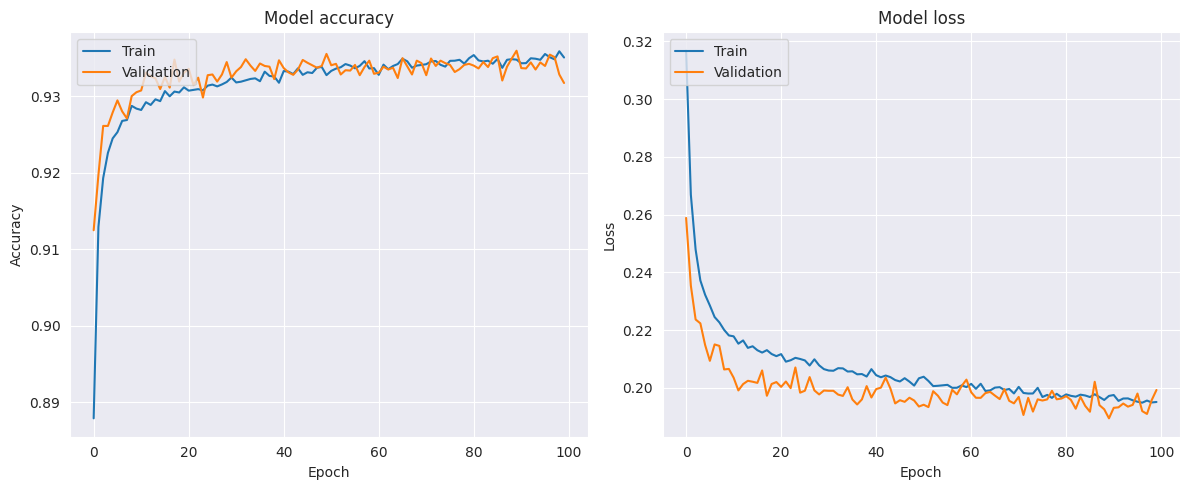

In [45]:
plot_training_history(history)

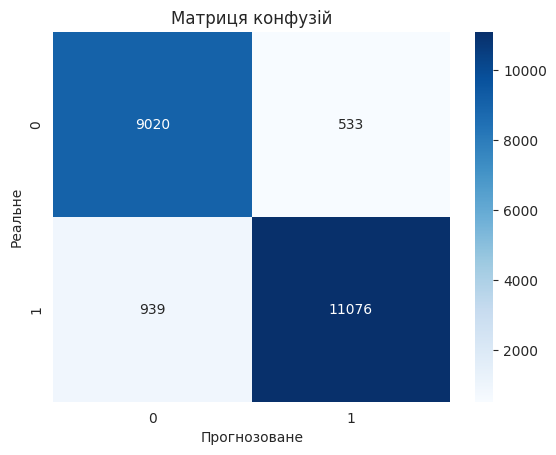

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця конфузій')
plt.xlabel('Прогнозоване')
plt.ylabel('Реальне')
plt.show()

In [47]:
filtered_df = df[df['remaining_contract'] < 0.01] #only people whose contract is over or nan
X2 = filtered_df.drop(columns=['id', 'churn',"service_failure_count", "remaining_contract"])
print(X2.shape)
y2 = filtered_df['churn']
print(y2.shape)


(37881, 7)
(37881,)
